In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline





**Explore the Data**

To read the required csv file

In [2]:
diabete=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabete.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


There are 767 rows in the dataset

In [5]:
diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabete.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:

print("Dataset shape is", diabete.shape)

Dataset shape is (768, 9)


**Visualization of the dataset**

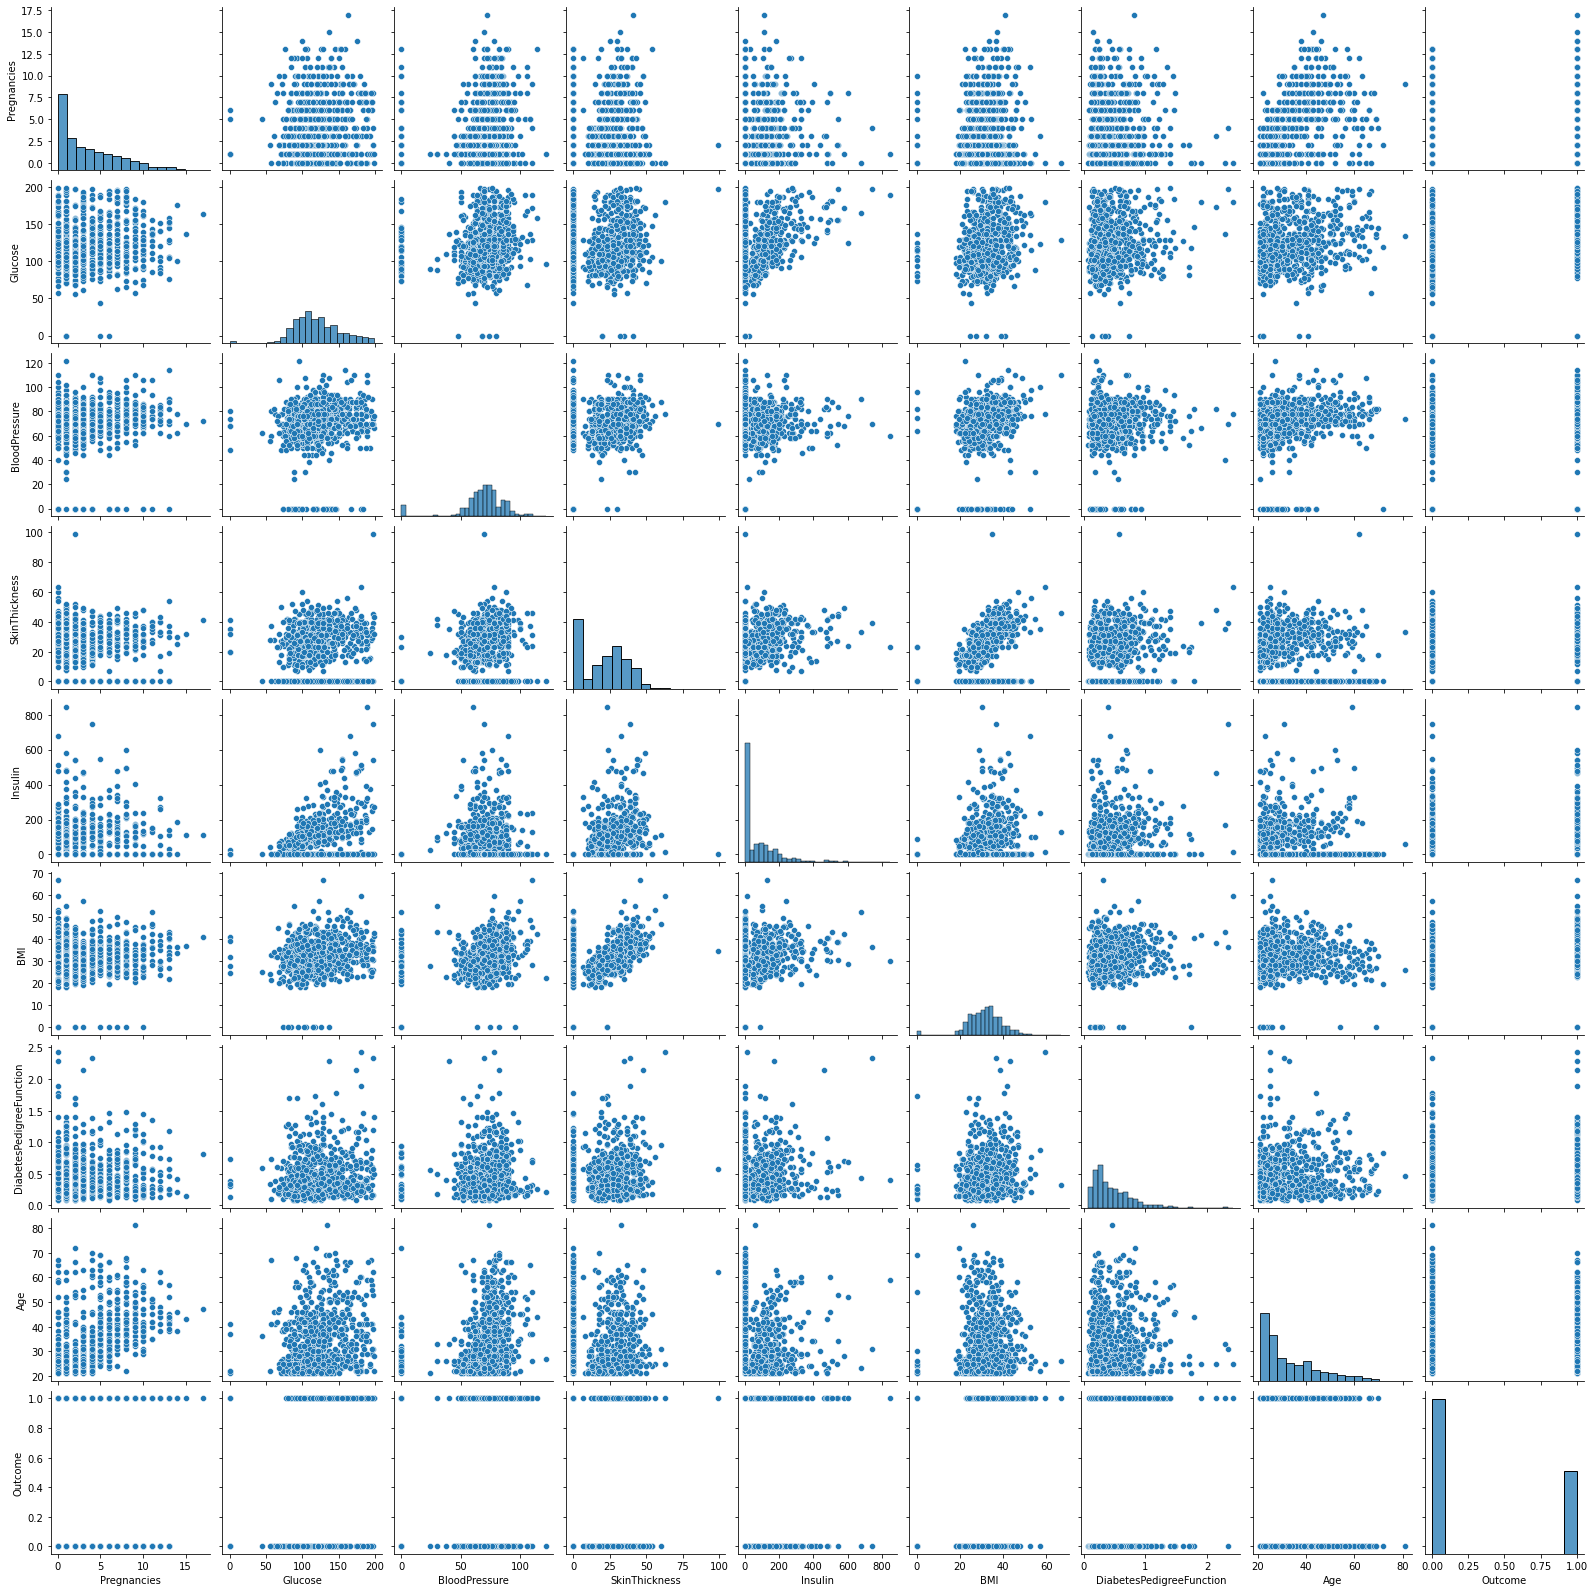

In [9]:
sns.pairplot(diabete)

**Finding the correlation**

<AxesSubplot:>

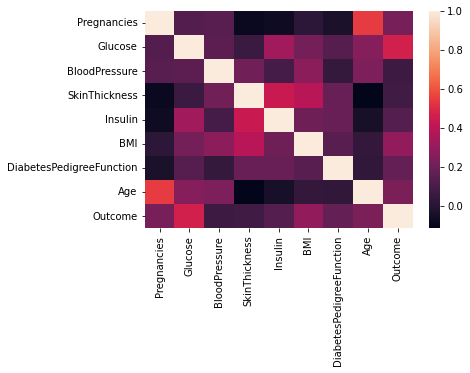

In [10]:
diabe_corr=diabete.corr()
sns.heatmap(diabe_corr)

In [11]:
#Replace the zeros
feature_col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for column in feature_col:
    diabete[column]=diabete[column].replace(0,np.NaN)
    mean=diabete[column].mean(skipna=True)
    diabete[column]=diabete[column].replace(np.NaN,mean)  

**Spliting the dataset**

In [12]:
x=diabete[feature_col]
y=diabete[['Outcome']]

In [13]:
#spliting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0 )

In [14]:
#feature scaling
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test) 

**Define the model : init K-NN**

In [15]:
clf=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)


**Evaluate the model**

In [16]:

print(confusion_matrix(y_test,y_predict))



[[94 13]
 [19 28]]


In [17]:
print(f1_score(y_test,y_predict))

0.6363636363636364


In [18]:
print(accuracy_score(y_test,y_predict))

0.7922077922077922


In [19]:
#Function to perform training with entropy
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=100,min_samples_split=4)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       random_state=100)

In [20]:
y_predict=clf.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [21]:
#Checking the accuracy
print("the accuracy is",metrics.accuracy_score(y_predict,y_test))

the accuracy is 0.7597402597402597


In [22]:
from sklearn import tree

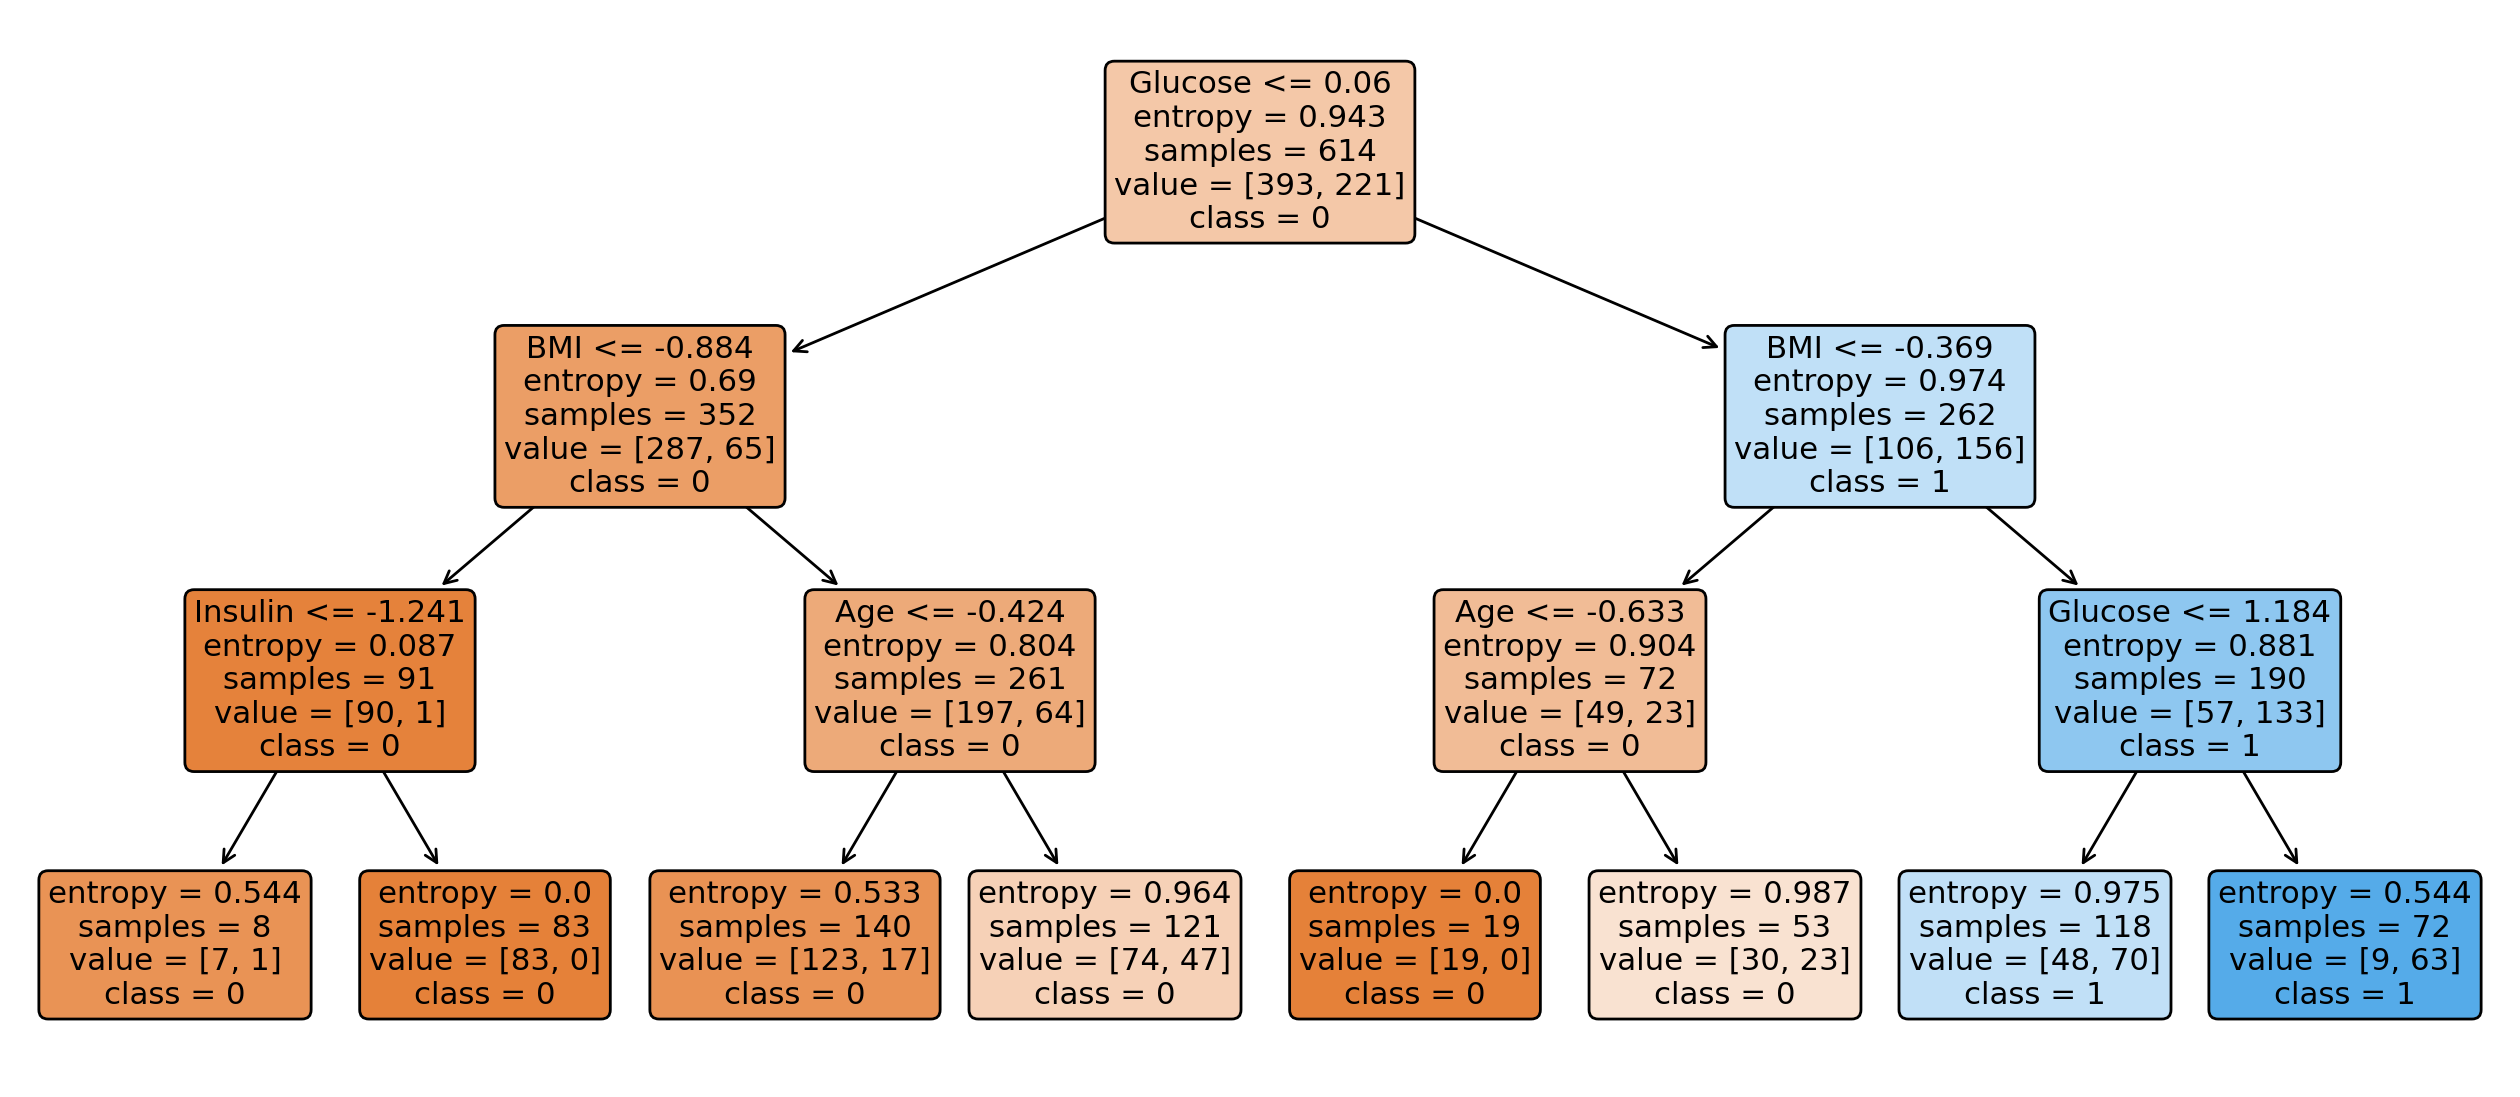

In [23]:
plt.figure(figsize=(16,7),dpi=200)
tree.plot_tree(clf,feature_names=feature_col,class_names=["0","1"],filled=True,rounded=True);